Definindo as bibliotecas 

In [117]:
import numpy as np
import pandas as pd 
import time
import os
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

Definindo os parâmetros

In [118]:
L = 1.0           # Comprimento da barra (m)
u = 0.1           # Velocidade de advecção (m/s)
n = 101           # Número de nós no espaço
dt = 0.05         # Passo de tempo (s)
t_total = 5.0     # Tempo total de simulação (s)

# Condições Físicas
T_init = 20.0  # Temperatura inicial da barra
T_contorno= 100.0 # Condição de contorno em x=0 (Dirichlet)

Definindo função principal

In [119]:
def adveccao(L,u,n,dt,t_total,T_i,T_cont):
    dx= L/(n-1) 
    C= u*dt/dx
    x= np.linspace(0,L,n)
    t_atual=np.full((n,),T_i)
    t_futuro=np.zeros((n,))
    t_atual[0]= T_cont
    tempos= int(t_total/dt)
    historico = []
    for k in range(tempos):
        for i in range(1,n):
            t_futuro[i]= t_atual[i]- C*(t_atual[i]- t_atual[i-1])
        t_futuro[0]= T_cont
        t_futuro[-1]= t_atual[-2] 
        t_atual= t_futuro.copy()
        historico.append(t_atual.copy())
        
    return x, historico

Executando a função

In [120]:
x , historico = adveccao(L,u,n,dt,t_total,T_init,T_contorno)
y=np.array(historico)
print(y.shape)
print (y)


(100, 101)
[[100.  60.  20. ...  20.  20.  20.]
 [100.  80.  40. ...  20.  20.  20.]
 [100.  90.  60. ...  20.  20.  20.]
 ...
 [100. 100. 100. ...  20.  20.  20.]
 [100. 100. 100. ...  20.  20.  20.]
 [100. 100. 100. ...  20.  20.  20.]]


fazendo dataframe e arquivos com os dados da simulação

In [121]:
resultados= pd.DataFrame(y)
resultados.to_csv('resultados_adveccao.csv', index=False)
resultados

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,100.0,60.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
1,100.0,80.0,40.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
2,100.0,90.0,60.0,30.0,20.0,20.0,20.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
3,100.0,95.0,75.0,45.0,25.0,20.0,20.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
4,100.0,97.5,85.0,60.0,35.0,22.5,20.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
96,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
97,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
98,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0


fazendo heatmap da dispersão de calor

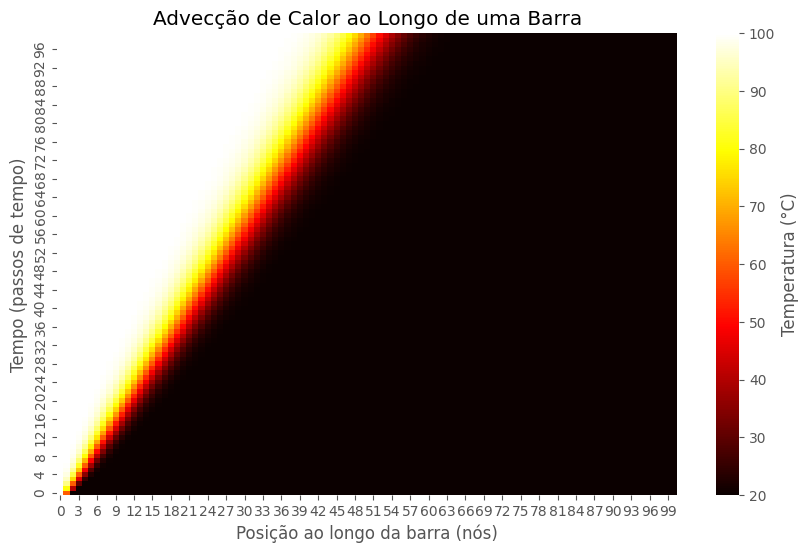

In [122]:
plt.figure(figsize=(10,6))
sns.heatmap(y, cmap='hot', cbar_kws={'label': 'Temperatura (°C)'})
plt.xlabel('Posição ao longo da barra (nós)')
plt.ylabel('Tempo (passos de tempo)')
plt.title('Advecção de Calor ao Longo de uma Barra')
plt.gca().invert_yaxis()  # Inverte o eixo y: tempo 0 no topo
plt.show()

Grafico da simulção

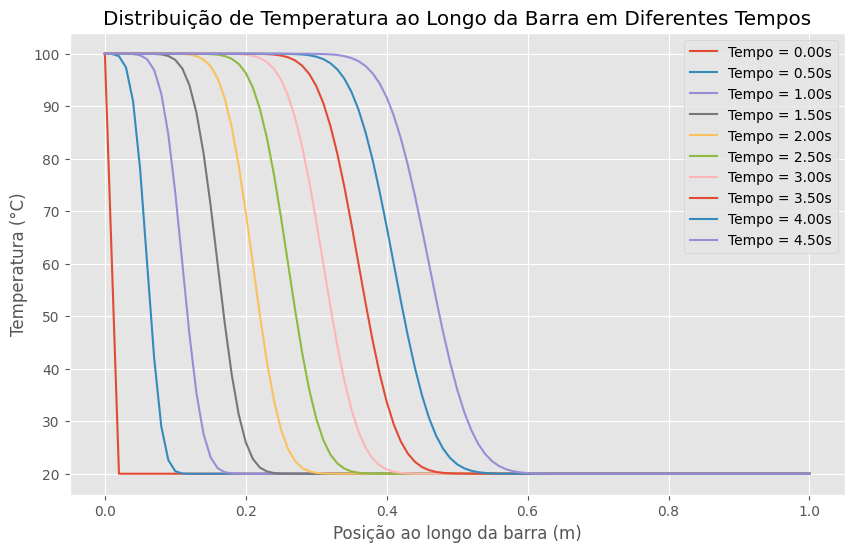

In [123]:
plt.figure(figsize=(10,6))
for i in range(0, len(y), max(1, len(y)//10)):
    plt.plot(np.linspace(0, L, n), y[i], label=f'Tempo = {dt*i:.2f}s')
plt.xlabel('Posição ao longo da barra (m)')
plt.ylabel('Temperatura (°C)')
plt.title('Distribuição de Temperatura ao Longo da Barra em Diferentes Tempos')
plt.legend()
plt.grid(True)
plt.show()

Mostrando instabilidade com dt> 0,1

In [124]:
dt_instavel = 0.15
t_total = 2.5

def adveccao_instavel(L, u, n, dt_instavel, t_total, T_i, T_cont):
    dx = L / (n - 1)
    C = u * dt_instavel / dx
    x = np.linspace(0, L, n)
    t_atual = np.full((n,), T_i)
    t_futuro = np.zeros((n,))
    t_atual[0] = T_cont
    tempos = int(t_total / dt_instavel)
    historico = []
    for k in range(tempos):
        for i in range(1, n):
            t_futuro[i] = t_atual[i] - C * (t_atual[i] - t_atual[i - 1])
        t_futuro[0] = T_cont
        t_futuro[-1] = t_atual[-2]
        t_atual = t_futuro.copy()
        historico.append(t_atual.copy())
    return x, historico

Graficos para o dt instavel

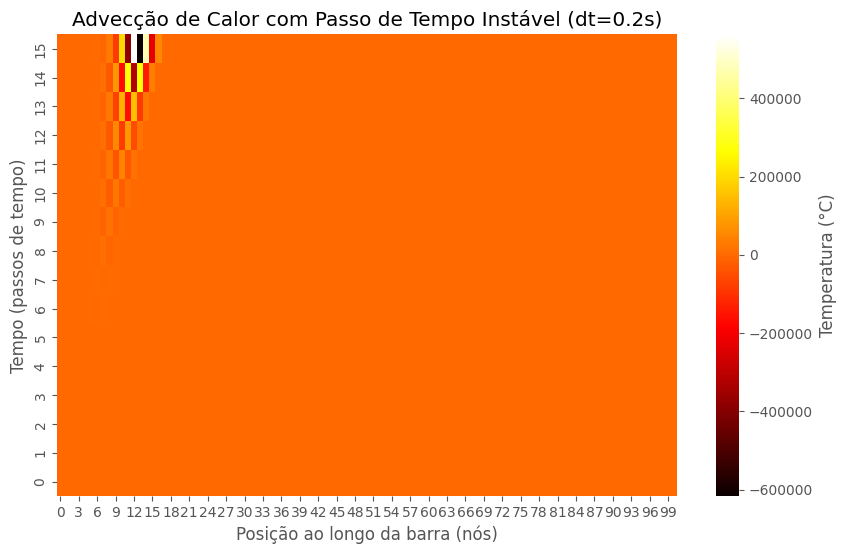

In [125]:
plt.figure(figsize=(10,6))
x_instavel, historico_instavel = adveccao_instavel(L, u, n, dt_instavel, t_total, T_init, T_contorno)
y_instavel = np.array(historico_instavel)
sns.heatmap(y_instavel, cmap='hot', cbar_kws={'label': 'Temperatura (°C)'})
plt.xlabel('Posição ao longo da barra (nós)')
plt.ylabel('Tempo (passos de tempo)')
plt.title('Advecção de Calor com Passo de Tempo Instável (dt=0.2s)')
plt.gca().invert_yaxis()  
plt.show()

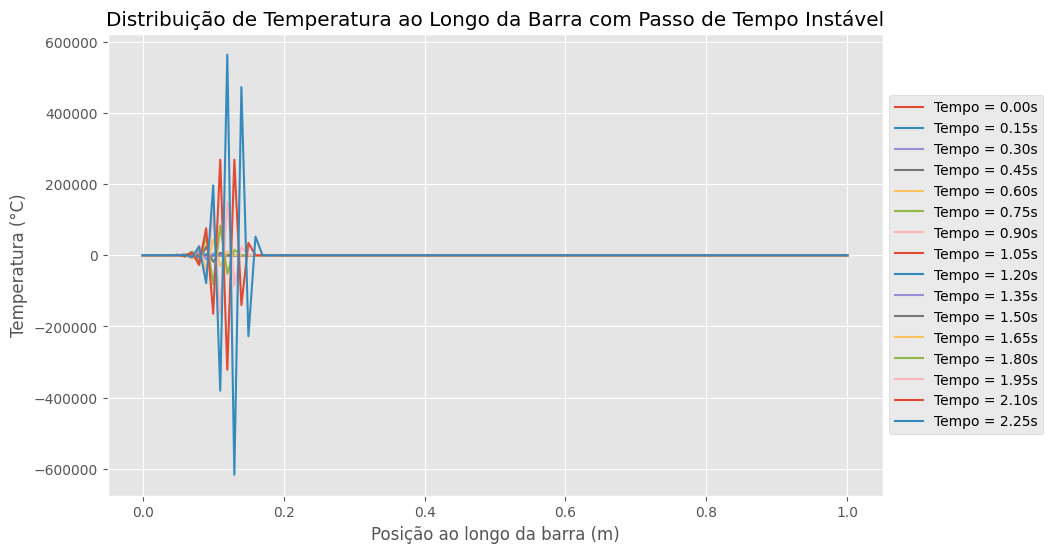

In [126]:
plt.figure(figsize=(10,6))
for i in range(0, len(y_instavel), max(1, len(y_instavel)//10)):
    plt.plot(np.linspace(0, L, n), y_instavel[i], label=f'Tempo = {dt_instavel*i:.2f}s')
plt.xlabel('Posição ao longo da barra (m)')
plt.ylabel('Temperatura (°C)')
plt.title('Distribuição de Temperatura ao Longo da Barra com Passo de Tempo Instável')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()


As analises a seguir são variando os parametros fornecidos, afim de descobrir como a equação de transporte funciona 


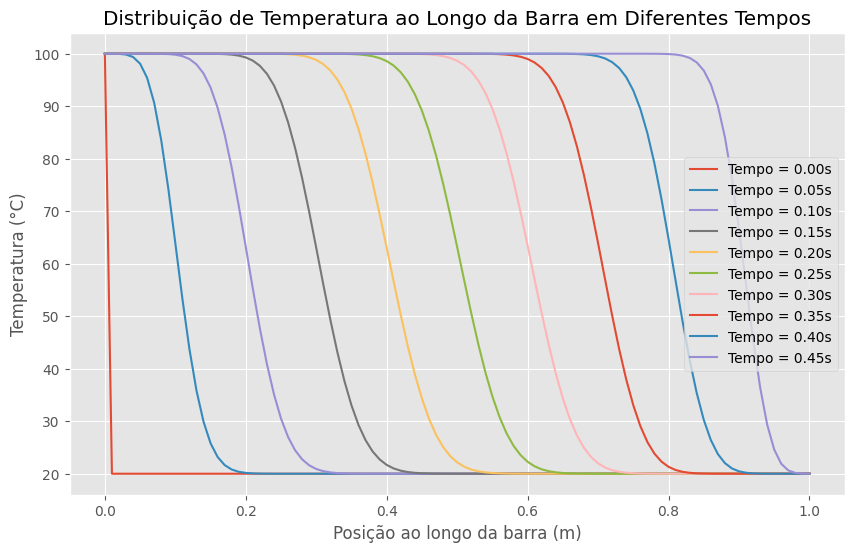

In [127]:
u_variado= np.arange(0,0.2,0.02)
t_total= 5.0
def adveccao_variando_u(L, u_variado, n, dt, t_total, T_i, T_cont):
    resultados_u = []
    for vel in u_variado:
        x, historico = adveccao(L, vel, n, dt, t_total, T_i, T_cont)
        resultados_u.append(np.array(historico)[-1]) 
    return np.array(resultados_u) , x
y , x = adveccao_variando_u(L, u_variado, n, dt, t_total, T_init, T_contorno)

plt.figure(figsize=(10,6))
for i in range(0, len(y), max(1, len(y)//10)):
    plt.plot(np.linspace(0, L, n), y[i], label=f'Tempo = {dt*i:.2f}s')
plt.xlabel('Posição ao longo da barra (m)')
plt.ylabel('Temperatura (°C)')
plt.title('Distribuição de Temperatura ao Longo da Barra em Diferentes Tempos')
plt.legend()
plt.grid(True)
plt.show()

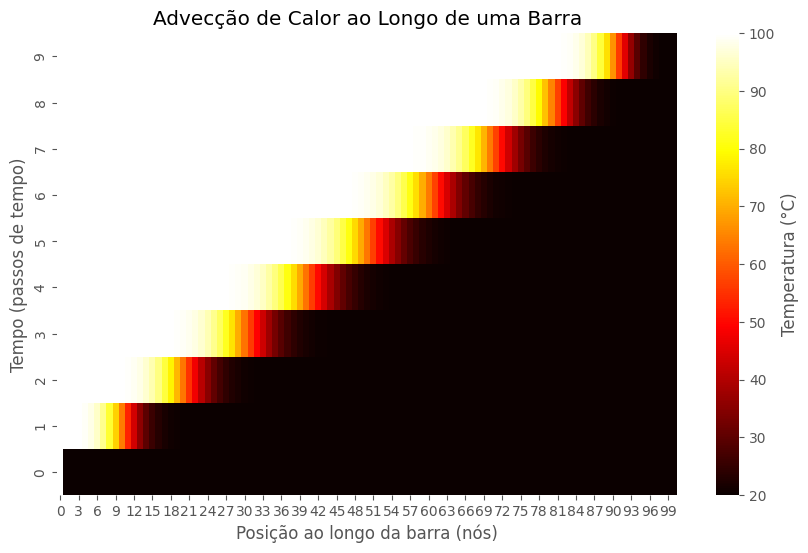

In [128]:
plt.figure(figsize=(10,6))
sns.heatmap(y, cmap='hot', cbar_kws={'label': 'Temperatura (°C)'})
plt.xlabel('Posição ao longo da barra (nós)')
plt.ylabel('Tempo (passos de tempo)')
plt.title('Advecção de Calor ao Longo de uma Barra')
plt.gca().invert_yaxis()  # Inverte o eixo y: tempo 0 no topo
plt.show()

Variando a condição de contorno

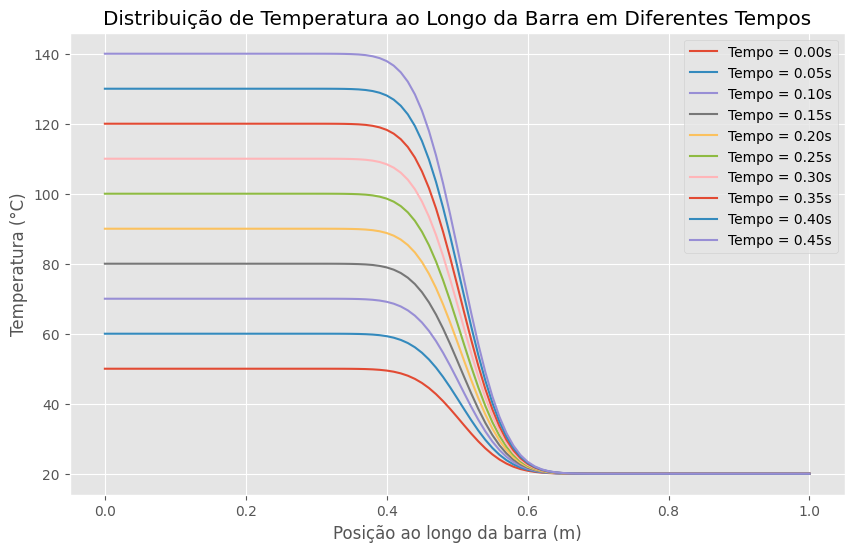

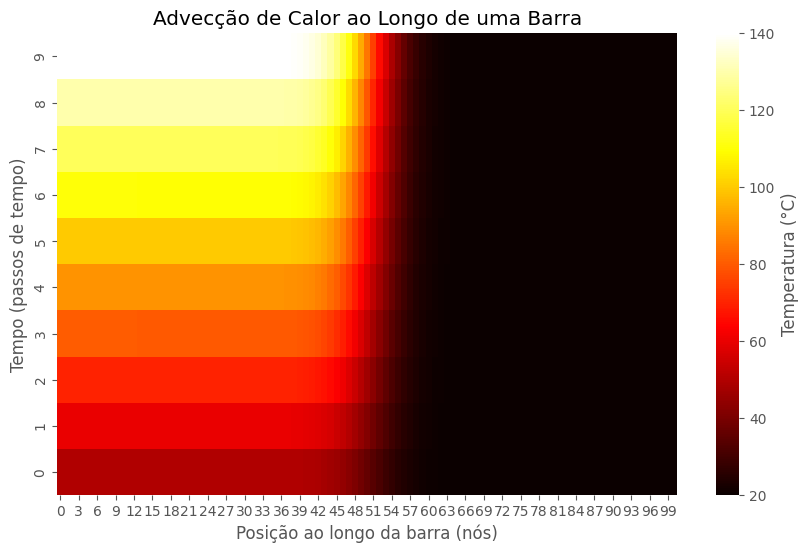

In [129]:
T_contorno_variado= np.arange(50,150,10)
t_total= 5.0

def adveccao_variando_Tc(L, u, n, dt, t_total, T_i, T_contorno_variado):
    resultados_Tc = []
    for Tc in T_contorno_variado:
        x, historico = adveccao(L, u, n, dt, t_total, T_i, Tc)
        resultados_Tc.append(np.array(historico)[-1]) 
    return np.array(resultados_Tc) , x
y , x = adveccao_variando_Tc(L, u, n, dt, t_total, T_init, T_contorno_variado)

plt.figure(figsize=(10,6))
for i in range(0, len(y), max(1, len(y)//10)):
    plt.plot(np.linspace(0, L, n), y[i], label=f'Tempo = {dt*i:.2f}s')
plt.xlabel('Posição ao longo da barra (m)')
plt.ylabel('Temperatura (°C)')
plt.title('Distribuição de Temperatura ao Longo da Barra em Diferentes Tempos')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(y, cmap='hot', cbar_kws={'label': 'Temperatura (°C)'})
plt.xlabel('Posição ao longo da barra (nós)')
plt.ylabel('Tempo (passos de tempo)')
plt.title('Advecção de Calor ao Longo de uma Barra')
plt.gca().invert_yaxis() 
plt.show()
